# Ocean Circulation Diagnostics

### Import modules

In [1]:
import sys
#sys.path.insert(0, '../..')
from IPython import get_ipython
from IPython.lib.deepreload import reload

%load_ext autoreload
%autoreload 2
from aqua import Reader,catalogue, inspect_catalogue
from ocean3d import load_obs_data
from ocean3d import check_variable_name
from ocean3d import stratification
from ocean3d import plot_spatial_mld_clim 
from aqua.util import load_yaml

### Model Data import

This block is to load the data of a model (chosen from the catalog as an example )


In [2]:
reader = Reader(model='IFS-NEMO', exp='historical-1990', source="lra-r100-monthly")

data = reader.retrieve(startdate="1990", enddate="1990")
data = check_variable_name(data)


2024-03-20 13:51:57 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-03-20 13:51:57 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990, source lra-r100-monthly
2024-03-20 13:52:03 :: Unit :: WARNING  -> The unit of Pot. Temperature is Kelvin. Converting to degC


In [3]:
data

<xarray.Dataset>
Dimensions:      (time: 12, lat: 180, lon: 360, lev: 75, plev: 19)
Coordinates:
  * time         (time) datetime64[ns] 1990-01-01 1990-02-01 ... 1990-12-01
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lev          (lev) float64 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    idx_level    (lev) int64 dask.array<chunksize=(75,), meta=np.ndarray>
  * plev         (plev) float64 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
Data variables: (12/37)
    2t           (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    avg_hc700m   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    avg_siconc   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    avg_sithick  (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    avg_so       (time, lev, lat, lon) float64 dask.array<chunksize=(12, 75, 180, 360), meta=np.ndarray>
    avg_sos      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ...           ...
    tcc          (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    tciw         (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    tclw         (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    tprate       (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    u            (time, plev, lat, lon) float64 dask.array<chunksize=(12, 19, 180, 360), meta=np.ndarray>
    v            (time, plev, lat, lon) float64 dask.array<chunksize=(12, 19, 180, 360), meta=np.ndarray>
Attributes:
    history:  \n2024-03-20 13:52:03 AQUA💧: Retrieved from IFS-NEMO_historical...

### Loading Observation Data

In [4]:
obs_data = load_obs_data(model='EN4', exp='en4', source='monthly')
obs_data = check_variable_name(obs_data)


2024-03-20 13:52:04 :: Reader :: ERROR    -> Variable time_bnds has no units!
2024-03-20 13:52:04 :: Reader :: ERROR    -> Variable lon_bnds has no units!
2024-03-20 13:52:04 :: Reader :: ERROR    -> Variable lat_bnds has no units!
2024-03-20 13:52:04 :: Reader :: ERROR    -> Variable lev_bnds has no units!
2024-03-20 13:52:13 :: Unit :: WARNING  -> The unit of Pot. Temperature is Kelvin. Converting to degC


In [5]:
obs_data


<xarray.Dataset>
Dimensions:             (lon: 360, time: 876, bnds: 2, lat: 180, lev: 42)
Coordinates:
  * lon                 (lon) float64 1.0 2.0 3.0 4.0 ... 358.0 359.0 360.0
  * lat                 (lat) float64 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0
  * lev                 (lev) float32 5.022 15.08 25.16 ... 5.051e+03 5.35e+03
    idx_lev             (lev) int64 0 1 2 3 4 5 6 7 ... 34 35 36 37 38 39 40 41
  * time                (time) datetime64[ns] 1950-01-01 ... 2022-12-01
Dimensions without coordinates: bnds
Data variables:
    lon_bnds            (time, lon, bnds) float64 dask.array<chunksize=(1, 360, 2), meta=np.ndarray>
    lat_bnds            (time, lat, bnds) float64 dask.array<chunksize=(1, 180, 2), meta=np.ndarray>
    lev_bnds            (time, lev, bnds) float32 dask.array<chunksize=(1, 42, 2), meta=np.ndarray>
    avg_so              (time, lev, lat, lon) float32 dask.array<chunksize=(1, 1, 180, 360), meta=np.ndarray>
    so_uncertainty      (time, lev, lat, lon) float32 dask.array<chunksize=(1, 1, 180, 360), meta=np.ndarray>
    avg_thetao          (time, lev, lat, lon) float32 dask.array<chunksize=(1, 1, 180, 360), meta=np.ndarray>
    thetao_uncertainty  (time, lev, lat, lon) float32 dask.array<chunksize=(1, 1, 180, 360), meta=np.ndarray>
Attributes: (12/25)
    CDI:                    Climate Data Interface version 2.0.5 (https://mpi...
    Conventions:            CF-1.0
    institution:            UK Met Office
    title:                  Temperature and salinity analysis
    DSD_entry_id:           UKMO-L4UHFnd-GLOB-v01
    references:             Website and paper: https://www.metoffice.gov.uk/h...
    ...                     ...
    easternmost_longitude:  362.5
    file_quality_index:     0
    licence:                EN4 is distributed under the Non Commercial Gover...
    history:                Thu Jun 29 09:47:09 2023: cdo mergetime so_195001...
    NCO:                    netCDF Operators version 4.9.2 (Homepage = http:/...
    CDO:                    Climate Data Operators version 2.0.5 (https://mpi...

## Functions:

All functions (primary and secondary) can be found in ocean_circulation
The two primary diagnostic functions are:

### 1. plot_stratification

`plot_stratification(mod_data, region=None, time = None, latS:   float=None, latN: float=None, lonW: float=None,lonE: float=None, output= bool, output_dir="./figs")`

This function produces climatological stratification plots over a region in a model dataset and EN4 observations. It produces three lines, one for the whole model simulation, one for the model in the overlap period with EN4, and another for EN4 in the overlap period with the model. If there is no overlap period with observations, EN4 climatology is provided for the period 1950-2022.

It requires you to provide: 
- A file with model data of 3D ocean potential temperature and practical salinity
- A specific region where stratification is computed (or to provide a custom latxlon box instead)
- The temporal resolution over which the climatology is computed (annual, a given season or a given month). 
     
### 2. plot_spatial_mld

`plot_spatial_mld(data, region=None, time = None, overlap = bolean latS: float=None, latN: float=None, lonW: float=None,lonE: float=None, output= bool, output_dir="./figs")`

This function computes the mixed layer depth from monthly 3D ocean potential temperature and practical salinity, both for a model simulation and EN4 observations, and plots their climatology. It allows the user to choose if climatologies
are computed over the whole simulated and observed period, or over their overlap periods.

It requires you to provide:
- A file with model data of 3D ocean potential temperature and practical salinity
- A specific latitudinal/longitudinal box over which the MLD is shown
- The temporal resolution over which the climatology is computed (annual, a given season or a given month)

## Example

In [6]:
o3d_request= {'model':'IFS-NEMO',
'exp':'historical-1990',
'source': 'lra-r100-monthly',
'data': data,
'obs_data': obs_data,
'region':'Labrador Sea',
'latS':None,
'latN':None,
'lonW':None,
'lonE':None,
'output':True,
"time" : "February",
'output_dir':'./output'}

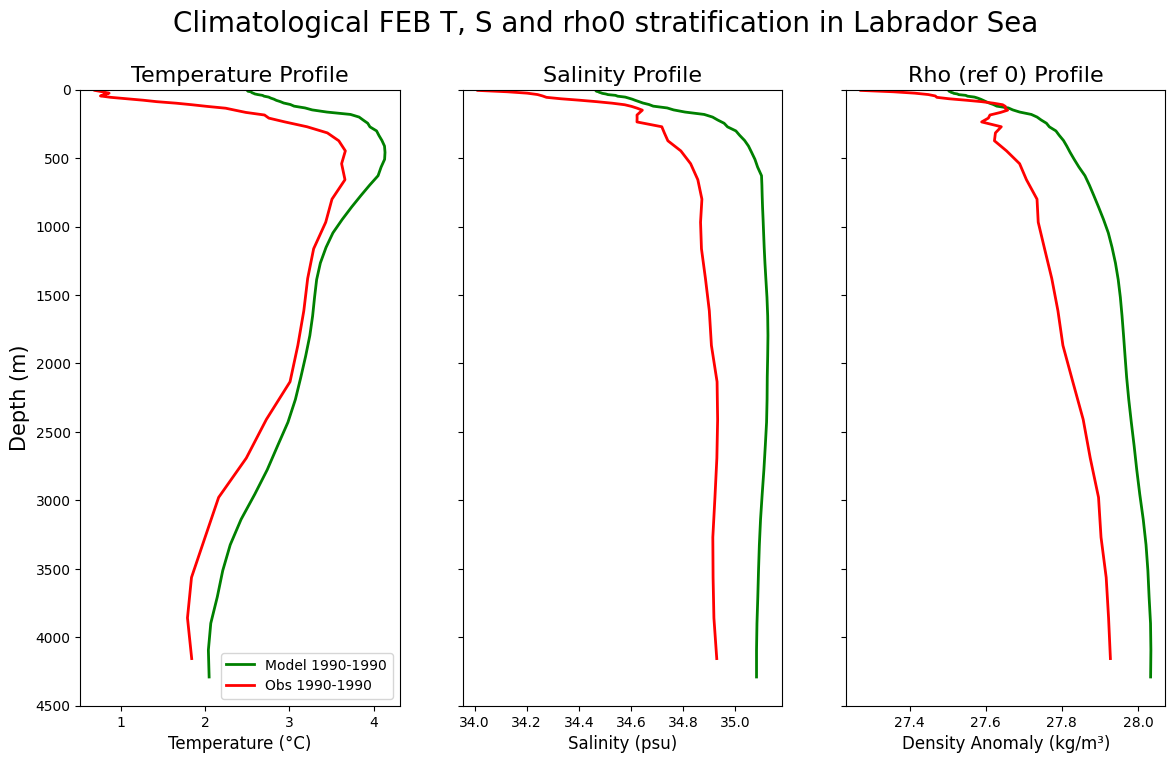

In [16]:
strat = stratification(o3d_request)
strat.plot()

To plot the climatological MLD in march, fma or the whole year in the Labrador and GIN Seas in all cases 
for the overlap period of the Model and Obs datasets we would call plot_spatial_mld_clim as shown below


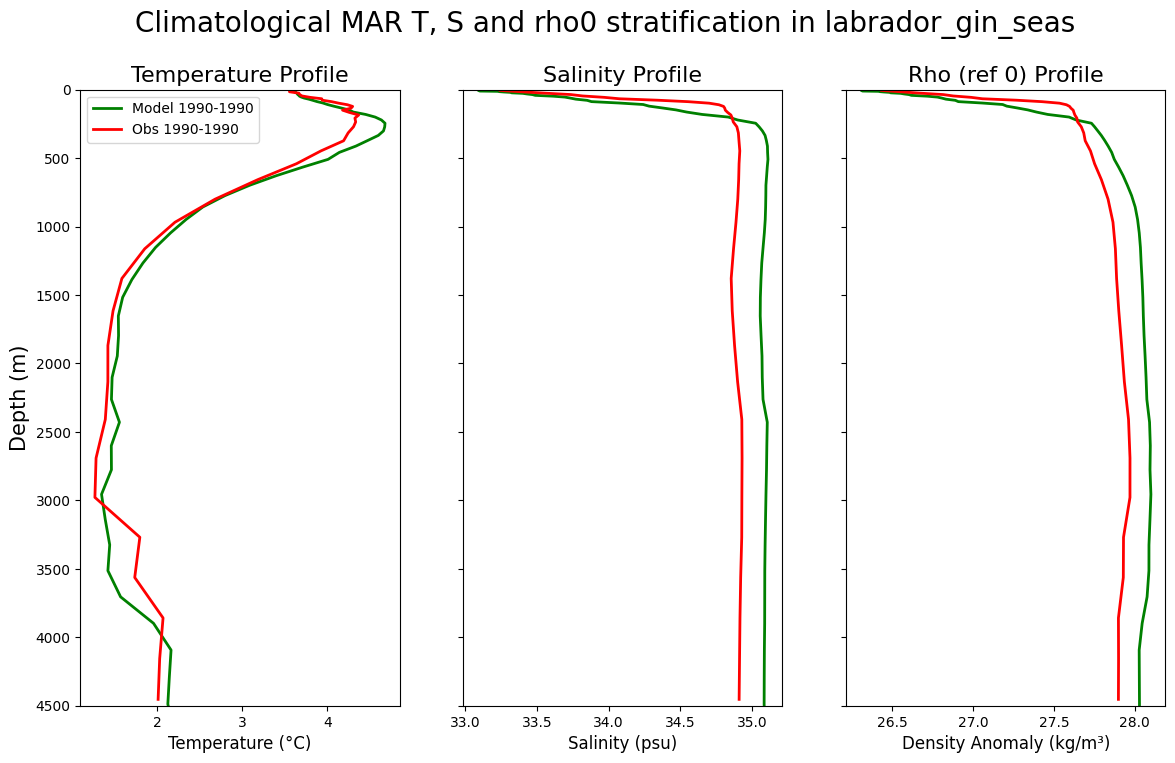

In [17]:
o3d_request["region"] = "labrador_gin_seas"
o3d_request["time"] = "Mar"

strat = stratification(o3d_request)
strat.plot()

This is an example of how to call thee same function but for the overlap period between OBS and the model, and using yearly means

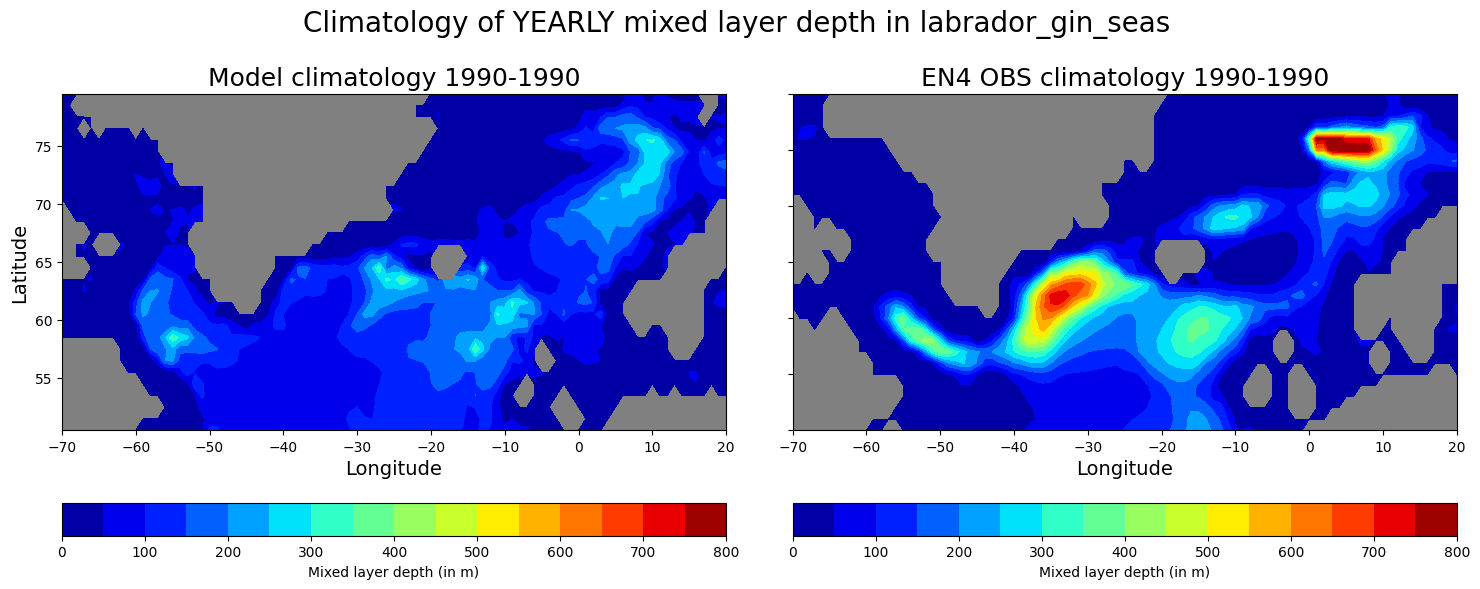

In [10]:
o3d_request["region"] = "labrador_gin_seas"
plot_spatial_mld_clim(o3d_request, time = "Y")

This example is for computing stratification in the Weddell Sea in the boreal winter (JJA)


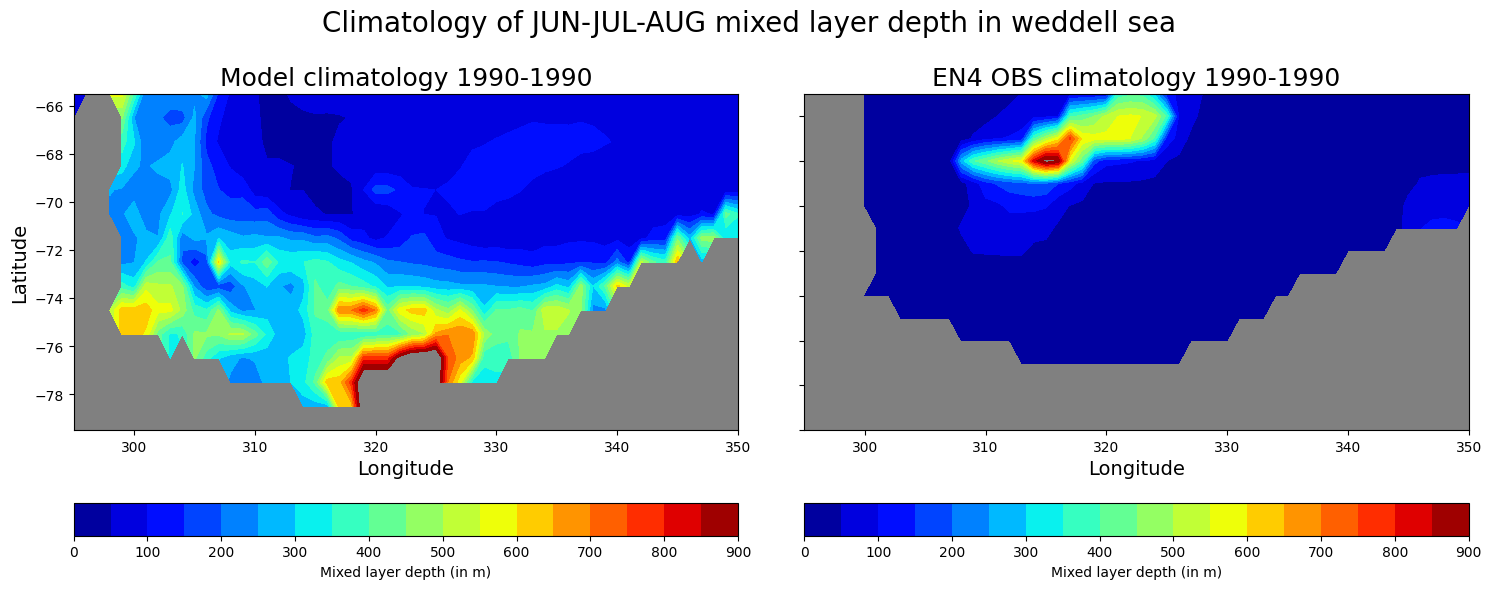

In [9]:
o3d_request["region"] = "weddell sea"
plot_spatial_mld_clim(o3d_request, time = "JJA")

This would be the equivalent plot but for the ocean stratification in the same region and time of the year

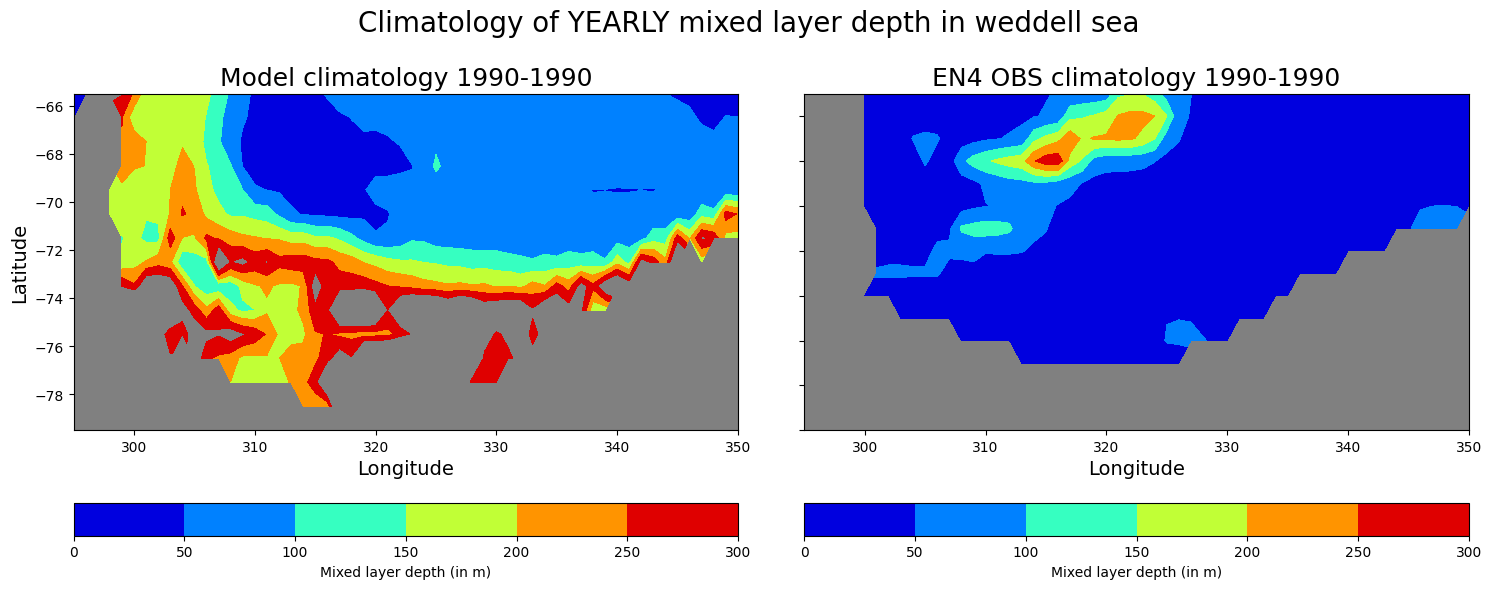

In [8]:
o3d_request["region"] = "weddell sea"
plot_spatial_mld_clim(o3d_request, time = "Y")

This final example plots MLD climatology in the southern ocean in the austral winter (JJA) over the overlap period of OBS/MODEL

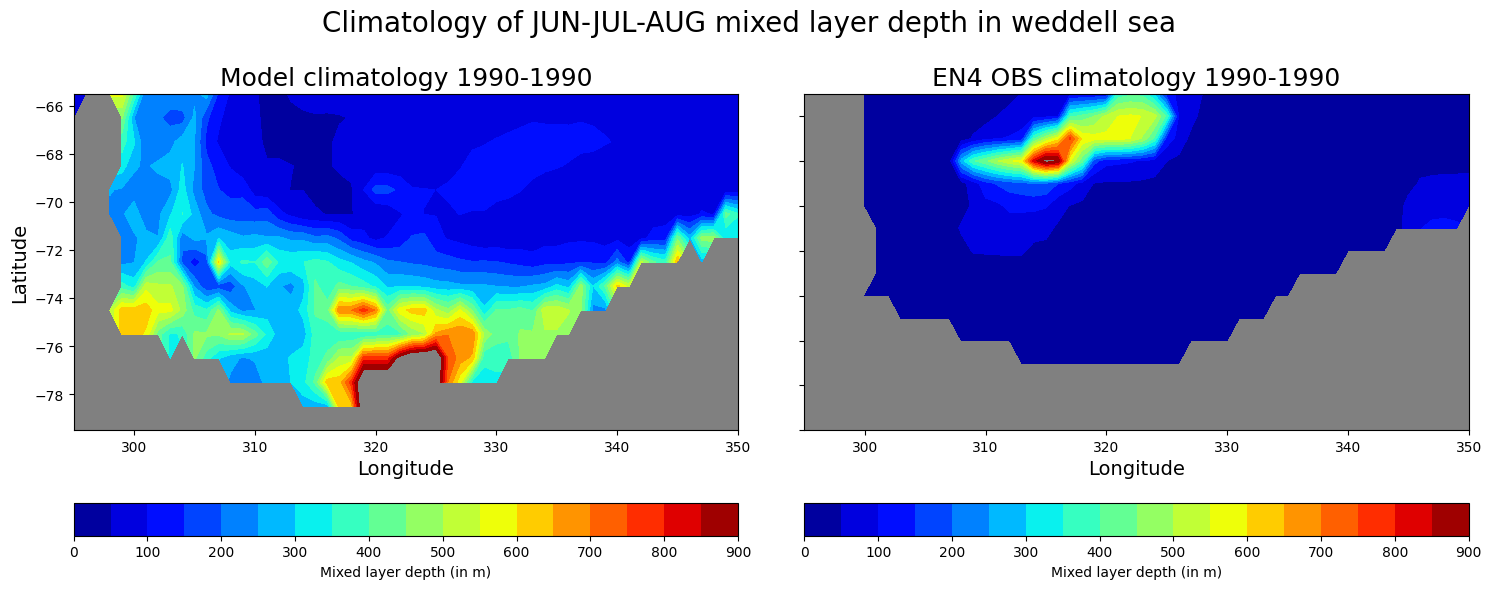

In [12]:
o3d_request["region"] = "weddell sea"
plot_spatial_mld_clim(o3d_request,time = "JJA")